# *Hackthon*

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [6]:
df = pd.read_csv("b2w.csv")
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4.0,1.0,1.0
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5.0,1.0,1.0
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1.0,1.0,1.0
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5.0,1.0,1.0
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3.0,-1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97633 entries, 0 to 97632
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_index         97633 non-null  int64  
 1   review_text            97633 non-null  object 
 2   review_text_processed  97632 non-null  object 
 3   review_text_tokenized  97632 non-null  object 
 4   polarity               85544 non-null  float64
 5   rating                 97632 non-null  float64
 6   kfold_polarity         97632 non-null  float64
 7   kfold_rating           97632 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ MB


In [8]:
df.describe(include='all')

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
count,97633.00000,97633,97632,97632,85544.000000,97632.000000,97632.000000,97632.000000
unique,NaN,96081,96067,95695,NaN,NaN,NaN,NaN
top,NaN,Entrega super rápida . Parabéns pela agilida...,entrega super rapida . parabens pela agilida...,[],NaN,NaN,NaN,NaN
freq,NaN,42,42,76,NaN,NaN,NaN,NaN
mean,66223.21337,NaN,NaN,NaN,0.692579,3.493793,3.557194,4.203560
std,38218.15753,NaN,NaN,NaN,0.461428,1.528452,2.633022,2.137638
min,0.00000,NaN,NaN,NaN,0.000000,1.000000,-1.000000,1.000000
25%,33154.00000,NaN,NaN,NaN,0.000000,2.000000,2.000000,2.000000
50%,66156.00000,NaN,NaN,NaN,1.000000,4.000000,4.000000,4.000000
75%,99349.00000,NaN,NaN,NaN,1.000000,5.000000,6.000000,6.000000


In [9]:
df.isna().sum()

,0
original_index,0
review_text,0
review_text_processed,1
review_text_tokenized,1
polarity,12089
rating,1
kfold_polarity,1
kfold_rating,1


Removendo texto vazio.

In [12]:
df['review_text'] = df['review_text'].astype(str)
df = df[df['review_text'].str.strip() != ""]
df.shape

(97633, 8)

In [13]:
df['review_text_processed'] = df['review_text_processed'].astype(str)
df = df[df['review_text_processed'].str.strip() != ""]
df.shape

(97633, 8)

In [14]:
df['review_text_tokenized'] = df['review_text_tokenized'].astype(str)
df = df[df['review_text_tokenized'].str.strip() != ""]
df.shape

(97633, 8)

In [21]:
def rating_to_sentiment(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df["label"] = df["rating"].apply(rating_to_sentiment)
df["label"].value_counts(normalize=True)

,proportion
label,
positive,0.606824
negative,0.269366
neutral,0.123811


In [16]:
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4.0,1.0,1.0
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5.0,1.0,1.0
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1.0,1.0,1.0
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5.0,1.0,1.0
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3.0,-1.0,1.0


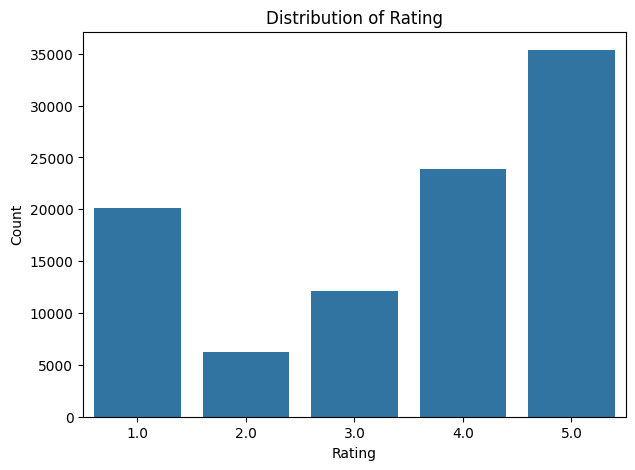

In [19]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [22]:
df["text"] = df["review_text_processed"]

<Axes: title={'center': 'Distribuição de Sentimentos (Rating → Label)'}, xlabel='label'>

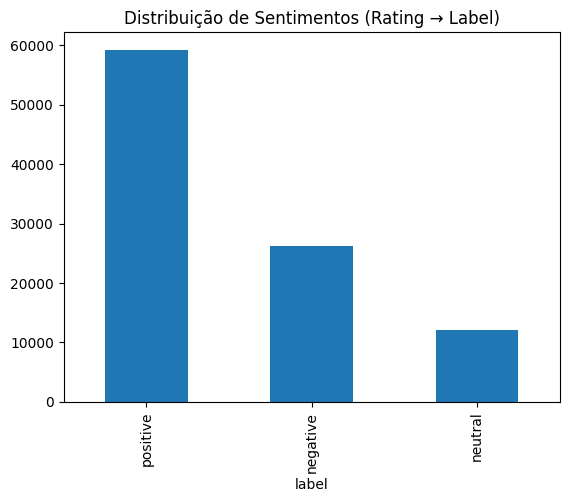

In [23]:
df["label"].value_counts().plot(kind="bar", title="Distribuição de Sentimentos (Rating → Label)")

In [24]:
df["text_len"] = df["text"].str.len()
df["text_len"].describe()

,text_len
count,97633.000000
mean,141.355515
std,136.884187
min,3.000000
25%,68.000000
50%,97.000000
75%,159.000000
max,4134.000000


Parte da Divisão

In [25]:
train_df = df[df["kfold_rating"] != 0]
test_df  = df[df["kfold_rating"] == 0]

X_train = train_df["text"]
y_train = train_df["label"]

X_test  = test_df["text"]
y_test  = test_df["label"]

In [31]:
FOLD_TESTE = 5

train_df = df[df["kfold_rating"] != FOLD_TESTE]
test_df  = df[df["kfold_rating"] == FOLD_TESTE]

X_train = train_df["text"]
y_train = train_df["label"]

X_test  = test_df["text"]
y_test  = test_df["label"]

print(len(X_train), len(X_test))

84396 13237


Adicionando StopWords


In [27]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
stopwords_pt = stopwords.words("portuguese")
len(stopwords_pt)

207

Vetorização

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    stop_words=stopwords_pt
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

Treinamento

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    n_jobs=-1
)

model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1)

In [34]:
from sklearn.metrics import classification_report

preds = model.predict(X_test_vec)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      3576
     neutral       0.32      0.52      0.39      1631
    positive       0.92      0.79      0.85      8030

    accuracy                           0.78     13237
   macro avg       0.69      0.73      0.70     13237
weighted avg       0.83      0.78      0.80     13237



Gerando e salvando o Pipeline


In [35]:
import joblib

pipeline = {
    "vectorizer": tfidf,
    "model": model,
    "sentiment_map": {
        "positive": "Positivo",
        "neutral": "Neutro",
        "negative": "Negativo"
    },
    "rating_rule": "1-2=negative, 3=neutral, 4-5=positive"
}

joblib.dump(pipeline, "modelo_b2w_rating_sentimento.pkl")

['modelo_b2w_rating_sentimento.pkl']